In [19]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
data = pd.read_csv('train.csv')

In [21]:
#Preview the data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
data.ndim

2

In [23]:
data.shape

(891, 12)

In [24]:
data.size

10692

In [25]:
#check for missing values
data.isnull().sum().sum()

np.int64(866)

In [26]:
#Proper breakdown of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
#Understand the data types of variou column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
#A look at numeric columns and a few summary metrics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [30]:
#copy the data to avoid making change to the original dataset
data = data.copy()

#clean the data
#drop the 'Cabin' column
data = data.drop('Cabin',axis=1)
#fill in NaNs in the 'Age' column through interpolation
data['Age'] = data['Age'].interpolate(method='linear')
#fill in the NaN in the 'Embarked' column 
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [31]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [32]:
#Counter check for missing values again
data.isnull().sum().sum()

np.int64(0)

In [33]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


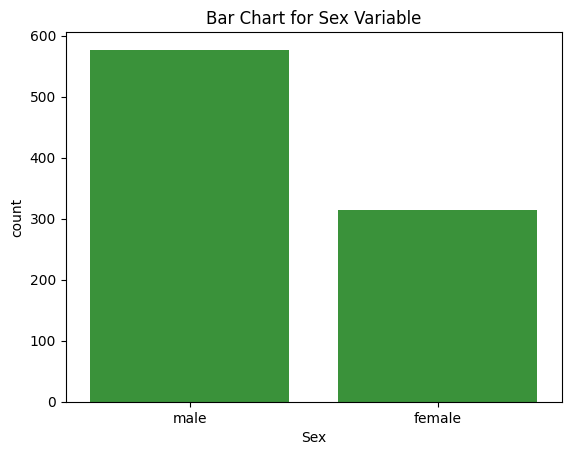

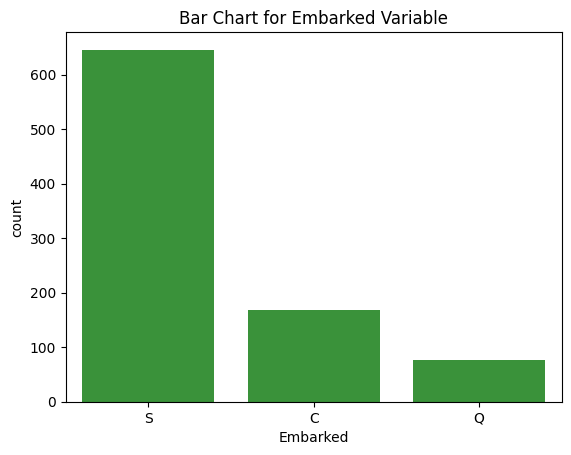

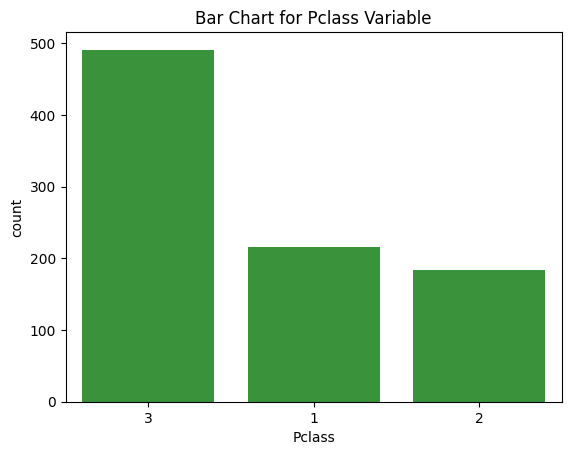

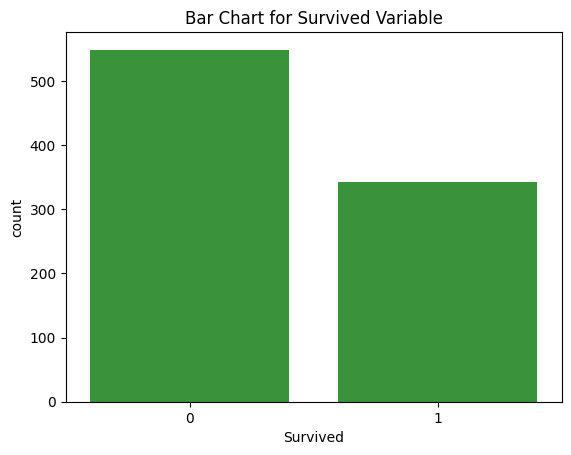

In [45]:
#ddefine the qualitative variables
qual_cols = ['Sex','Embarked','Pclass','Survived']
for col in qual_cols:
    plt.title(f'Bar Chart for {col} Variable')
    sb.countplot(data=data, x=col, order=data[col].value_counts().index, color = sb.color_palette()[2])
    plt.show()

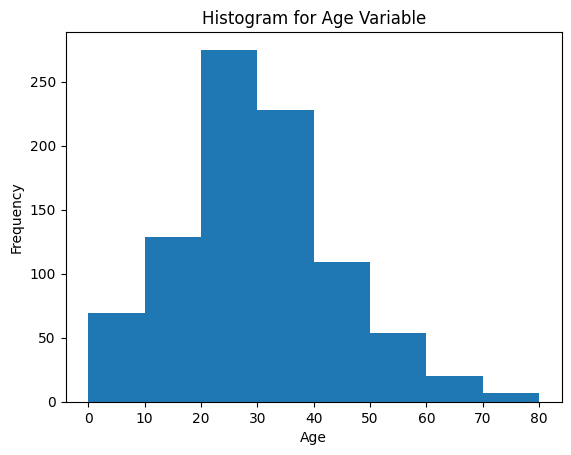

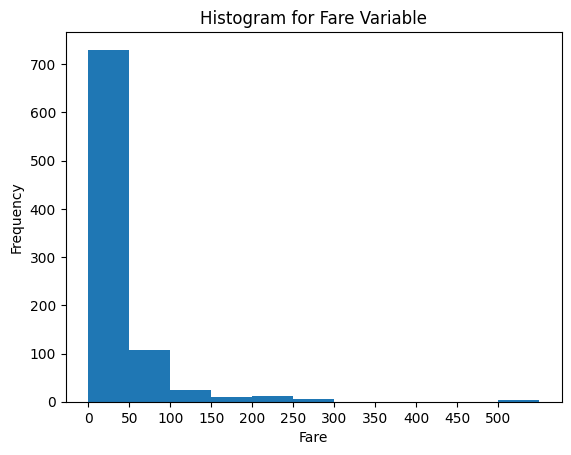

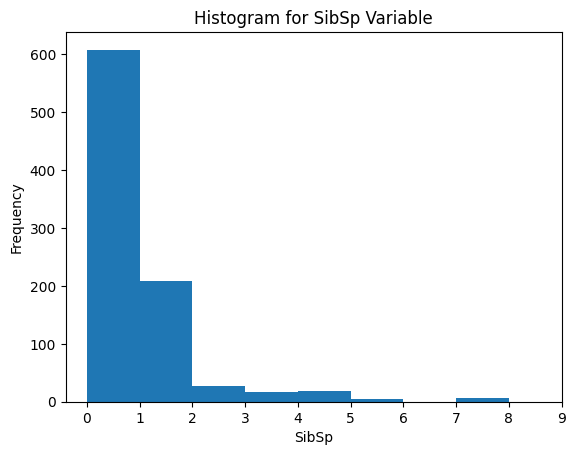

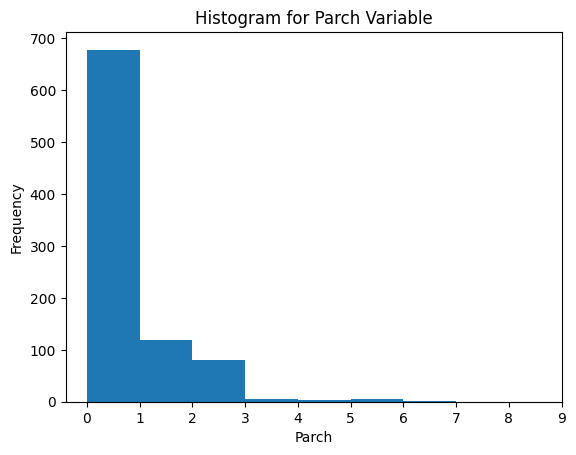

In [35]:
cols = ["Age", "Fare", "SibSp", "Parch"]
for col in cols:
    plt.figure()  # Create a new figure for each histogram
    plt.title(f"Histogram for {col} Variable")
    plt.ylabel('Frequency')
    plt.xlabel(f'{col}')
    
    if col == 'Age':
        a_bins = np.arange(0, data['Age'].max() + 5, 10)
        plt.hist(data=data, x=col, bins=a_bins)
    elif col == 'Fare':
        f_bins = np.arange(0, data['Fare'].max() + 50, 50)
        plt.hist(data=data, x=col, bins=f_bins)
        plt.xticks(np.arange(0, 550, 50))
    else:
        s_bins = np.arange(0, 9, 1)
        plt.hist(data=data, x=col, bins=s_bins)
        plt.xticks(np.arange(0, 10, 1))
    
    plt.show()  # Show the plot for each variable


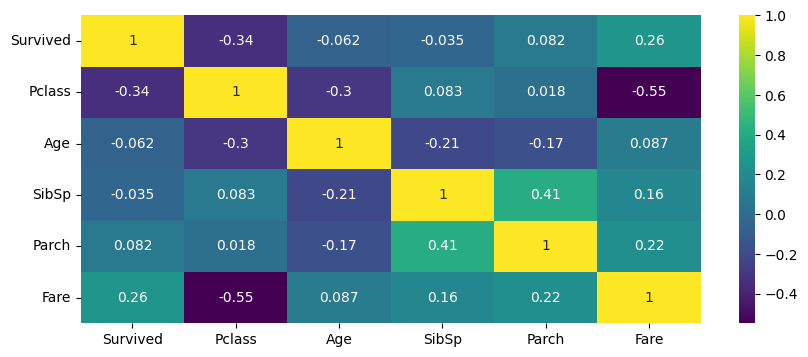

In [36]:
#visualize the corelation matrix
corr = data.drop('PassengerId', axis=1).corr(numeric_only=True)
plt.figure(figsize=(10,4))
sb.heatmap(corr, annot=True, cmap='viridis')
plt.show()

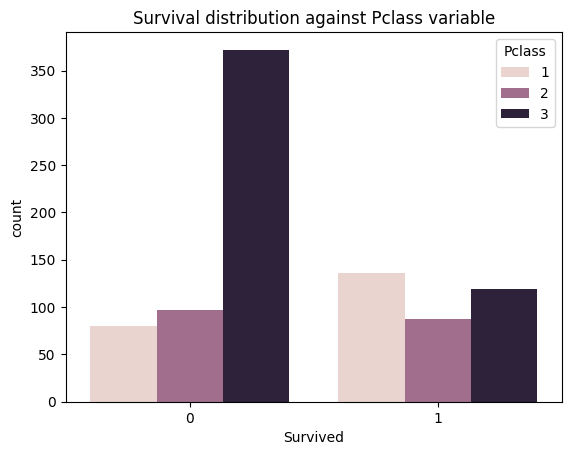

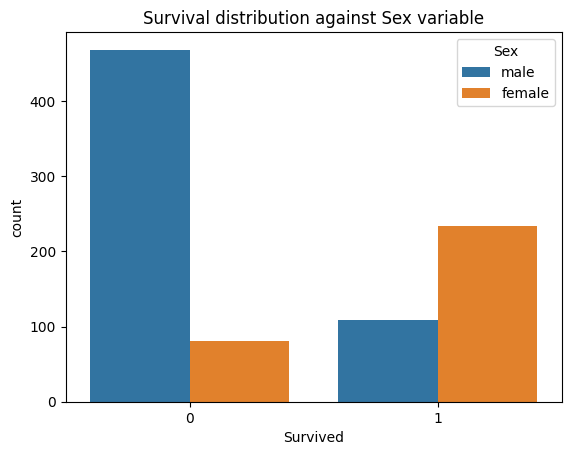

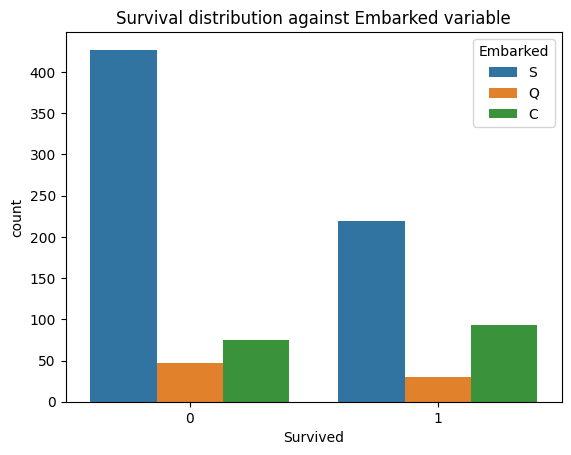

In [43]:
vars = ['Pclass','Sex','Embarked']
for var in vars:
    plt.title(f"Survival distribution against {var} variable")
    sb.countplot(data=data, x='Survived',hue=var)
    plt.show()

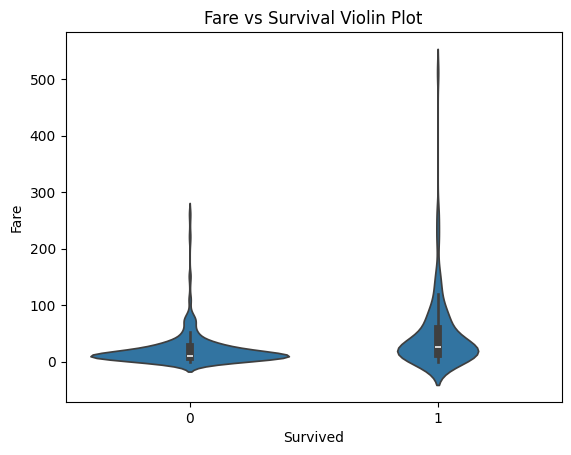

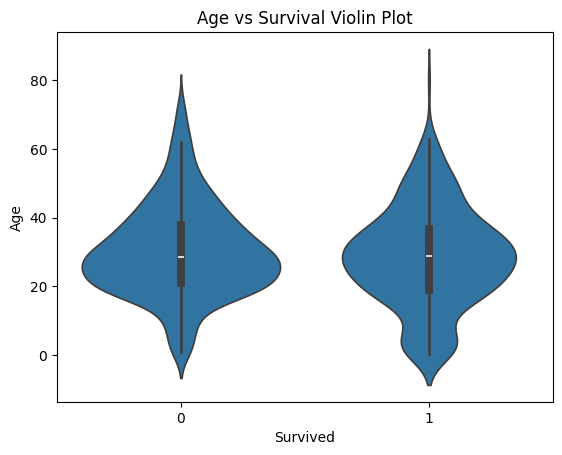

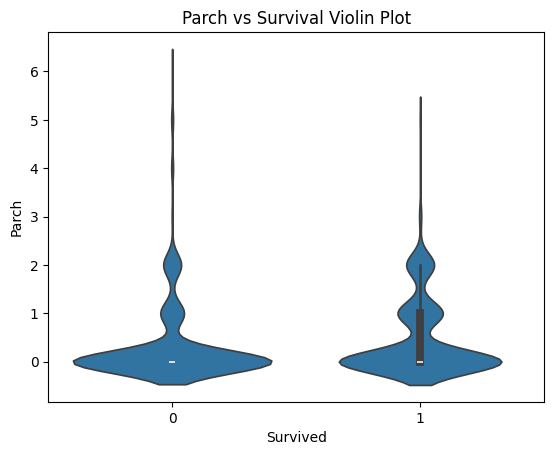

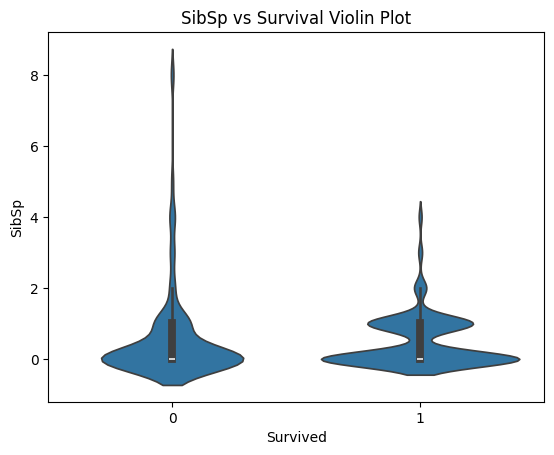

In [42]:
# Define the list of variables to plot
variables = ['Fare', 'Age', 'Parch', 'SibSp']

# Loop through each variable and plot
for var in variables:
    plt.title(f"{var} vs Survival Violin Plot")
    sb.violinplot(data=data, y=var, x='Survived')
    plt.show()


In [39]:
#define df for each class
pclass1 =  data[data['Pclass'] == 1]
pclass2 =  data[data['Pclass'] == 2]
pclass3 =  data[data['Pclass'] == 3]


In [40]:
min_Fare_class1=pclass1['Fare'].min()
max_Fare_class1=pclass1['Fare'].max()
avg_Fare_class1=pclass1['Fare'].mean()

print(f'Passengers who boarded Pclass1 paid rates between { min_Fare_class1} and {max_Fare_class1}')
print(f'On average, the rate paid in 1st Class was{avg_Fare_class1}')

Passengers who boarded Pclass1 paid rates between 0.0 and 512.3292
On average, the rate paid in 1st Class was84.1546875


In [41]:
min_Fare_class2=pclass2['Fare'].min()
max_Fare_class2=pclass2['Fare'].max()
avg_Fare_class2=pclass2['Fare'].mean()

print(f'Passengers who boarded Pclass2 paid rates between { min_Fare_class2} and {max_Fare_class2}')
print(f'On average, the rate paid in 2nd Class was{avg_Fare_class2}')

Passengers who boarded Pclass2 paid rates between 0.0 and 73.5
On average, the rate paid in 2nd Class was20.662183152173913


In [35]:
min_Fare_class3=pclass3['Fare'].min()
max_Fare_class3=pclass3['Fare'].max()
avg_Fare_class3=pclass3['Fare'].mean()

print(f'Passengers who boarded Pclass3 paid rates between { min_Fare_class3} and {max_Fare_class3}')
print(f'On average, the rate paid in 1st Class was{avg_Fare_class3}')

Passengers who boarded Pclass3 paid rates between 0.0 and 69.55
On average, the rate paid in 1st Class was13.675550101832993


In [37]:
no_Fare= data[data['Fare'] == 0.0]
no_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,26.00,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,38.50,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,47.00,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.50,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,20.50,0,0,112052,0.0,S


In [39]:
len(no_Fare)

15

In [40]:
print(f"min age: {no_Fare['Age'].min()}")
print(f"max age: {no_Fare['Age'].max()}")

min age: 17.0
max age: 49.0


In [41]:
no_Fare['Pclass'].mode()[0]

np.int64(2)

In [47]:
#Define age categories 
def categorize_age(age):
    if age<13:
        return 'Child'
    elif 13 <= age < 18:
        return 'Teen'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

#Step 2: Apply the function to create a new 'AgeGroup' column 
data['AgeGroup'] = data['Age'].apply(categorize_age)

#Step 3: Analyze survival rates by age group 
survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean() * 100 #In percentage 
survival_by_age_group

AgeGroup
Adult     36.538462
Child     54.320988
Senior    25.925926
Teen      45.454545
Name: Survived, dtype: float64